In [1]:
import tensorflow as tf

In [2]:
DIR = 'images_houseware'
VAL_SHARE = 0.25
LABEL_MODE = 'categorical'
SEED = 515
SUBSET = 'both'
BATCH_SIZE = 32


train, test = tf.keras.utils.image_dataset_from_directory(
    DIR,
    label_mode=LABEL_MODE,
    validation_split=VAL_SHARE,
    seed=SEED,
    subset=SUBSET,
    batch_size=BATCH_SIZE
)

Found 2883 files belonging to 10 classes.
Using 2163 files for training.
Using 720 files for validation.


In [17]:
import os

# print names of the classes
for class_name in os.listdir(DIR):
    if class_name != '.DS_Store':
        print(class_name)

STOOL_SEATING
LAMP
BED
CHAIR
PILLOW
SOFA
HOME_MIRROR
TABLE
SHELF
RUG


In [3]:
train = train.map(lambda image, label: (image / 255.0, label))
test = test.map(lambda image, label: (image / 255.0, label))

In [4]:
OPTIMIZER = tf.keras.optimizers.legacy.Adam(learning_rate=0.001) # use this if you have M1/M2 Mac, otherwise use the next line
# OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
LOSS = 'categorical_crossentropy'
METRICS = [tf.keras.metrics.F1Score('weighted')]

EPOCHS = 10

INPUT_SHAPE = (256, 256, 3)
N_CLASSES = 10

In [5]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=INPUT_SHAPE),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(N_CLASSES, activation='softmax')
    ]
)

In [6]:
model.compile(
    OPTIMIZER,
    LOSS,
    METRICS
)

In [7]:
history = model.fit(
    train,
    validation_data=test,
    epochs=EPOCHS
)

Epoch 1/10
68/68 [==============================] - 25s 364ms/step - loss: 1.4111 - f1_score: 0.5655 - val_loss: 0.8488 - val_f1_score: 0.7439
Epoch 2/10
68/68 [==============================] - 25s 369ms/step - loss: 0.4885 - f1_score: 0.8511 - val_loss: 0.6651 - val_f1_score: 0.7963
Epoch 3/10
68/68 [==============================] - 25s 360ms/step - loss: 0.3058 - f1_score: 0.8960 - val_loss: 0.6758 - val_f1_score: 0.8127
Epoch 4/10
68/68 [==============================] - 25s 362ms/step - loss: 0.2128 - f1_score: 0.9242 - val_loss: 0.6710 - val_f1_score: 0.8333
Epoch 5/10
68/68 [==============================] - 26s 385ms/step - loss: 0.1381 - f1_score: 0.9505 - val_loss: 0.7014 - val_f1_score: 0.8531
Epoch 6/10
68/68 [==============================] - 25s 365ms/step - loss: 0.1254 - f1_score: 0.9565 - val_loss: 0.6964 - val_f1_score: 0.8662
Epoch 7/10
68/68 [==============================] - 25s 364ms/step - loss: 0.1154 - f1_score: 0.9606 - val_loss: 0.9199 - val_f1_score: 0.8335

In [13]:
import matplotlib.pyplot as plt

def history_plot(history):
    train_f1_scores = history.history['f1_score']
    val_f1_scores = history.history['val_f1_score']

    epochs = range(1, len(train_f1_scores) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_f1_scores, 'bo-', label='Training F1 Score')
    plt.plot(epochs, val_f1_scores, 'ro-', label='Validation F1 Score')
    plt.title('Training and Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)
    plt.show()


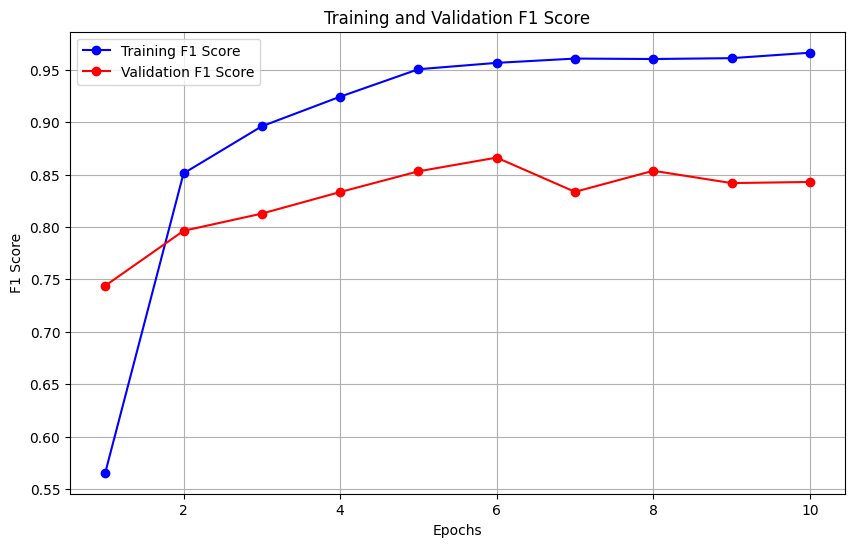

In [14]:
history_plot(history)